In [1]:
import os
import math
from collections import defaultdict
from typing import List 

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sns.set_theme(style='whitegrid', font_scale=1.5, palette='muted', 
              rc={'font.family':'serif', 'font.serif':'Times New Roman'})

In [14]:
PROJECT_FOLDER = os.path.dirname(os.path.abspath(''))
DATA_FOLDER = os.path.join(PROJECT_FOLDER, 'data')

titlesize = 22

cols_to_display = ['full_name', 'source_corpus', 'word_embedding_type', 'preprocess_text', 'kind',
                   'accuracy', 'macro avg_f1-score', 'macro avg_recall', 'macro avg_precision']

def managa_kind(row) -> str:
    kind = row['full_name'].split('-')[0] + ' ' + row['source_corpus']
    if row['preprocess_text']:
        kind += ' lemm'
    return kind

def load_df(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df['kind'] = df.apply(lambda row: managa_kind(row), axis=1)
    return df

def visualize_results(df: pd.DataFrame, suptitle: str = ''):      
    measures_to_plot = ['accuracy', 'macro avg_f1-score', 'macro avg_recall', 'macro avg_precision']
    
    measures_to_plot_title = {
        'accuracy': 'Dokładność',
        'macro avg_f1-score': 'Makro F1',
        'macro avg_recall': 'Makro czułość',
        'macro avg_precision': 'Makro precyzja'
    }
    
    fig, axs = plt.subplots(1, len(measures_to_plot), figsize=(12, 5), constrained_layout=True, sharey=True)
    
#     axs = [item for sublist in axs for item in sublist]
    
    for measure, ax in zip(measures_to_plot, axs):
        sns.barplot(x='word_embedding_type', y='accuracy', hue='kind', edgecolor="0", data=df, ax=ax)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
        ax.set_ylim(bottom=df[measure].min()-0.02)
        ax.set_xlabel('typ word embedding-u')
        
#         title = measure.replace('_',' ').replace('-',' ').capitalize()
        title = measures_to_plot_title[measure]
        ax.set_title(title, fontsize=titlesize)
        ax.set_ylabel('wartość')
    
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Typ modelu', ncol=2,
               loc='lower center', bbox_to_anchor=(0.5, -0.25), borderaxespad=0.)
    
    for ax in axs:
        ax.get_legend().remove()
    
    fig.suptitle(suptitle, fontsize=titlesize+4)
    file_name = suptitle + '.pdf'
    fig.savefig(file_name, bbox_inches='tight')    

# Rezultaty

In [15]:
file_name = 'results.csv'
file_path = os.path.join(DATA_FOLDER, file_name)

df = load_df(file_path)

# with pd.option_context('display.max_columns', None):
#     display(df.head(2))

In [16]:
# df[cols_to_display]

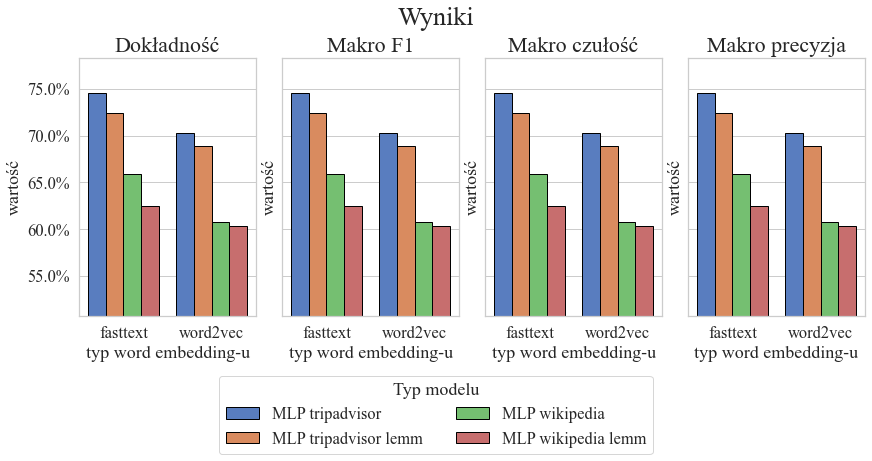

In [17]:
visualize_results(df, suptitle='Wyniki')